<a href="https://colab.research.google.com/github/valtercisecco/Spotify-Tracks-Dataset-Analysis/blob/main/Spotify_Tracks_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spotify Tracks Dataset Analysis**
This group college project aims to anlyse and treat the data from the public dataset https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data in order to predict the popularity rate of a song.

**Contributors:**
* Luis Francisco Ribeiro Malaquias - 254289 https://github.com/Luis-Malaquias
* Pedro Trama Fernandes Pereira - 254344 https://github.com/PedroTrama
* Valterci Almeida Secco Junior - 254370 https://github.com/valtercisecco

**Professor**
* Profª. Drª Ana Estela Antunes da Silva

**Class**
* TT004A - Data Mining

*October 2023*


# **1. Data Preprocessing**
Here we treat all relevant data to the classifier in order to improve our results. Some of the processes were:
*   Remove irrelevant columns;
*   Remove null values;
*   Remove repeated values;
*   Treat numerical and categorical values;
*   Treat outliers;




In [ ]:
#libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import yeojohnson
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#defining and testing dataset

df = pd.read_csv('/content/drive/Shareddrives/MD - Trabalho/dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
#dataset metadata

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [ ]:
#dataset description

df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
#removing dataset index and null values

df = df.drop(['Unnamed: 0', 'album_name', 'track_name'], axis=1)
df.dropna(inplace=True)

In [ ]:
#checking if there are null objects

df.isnull().sum()

track_id            0
artists             0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
#checking repeated tracks

df['track_id'].nunique()

89740

In [ ]:
#checking repeated values by the Track Id

df_repeated = df[df['track_id'].duplicated(keep = False)]
print(df_repeated.shape)
df_repeated.groupby('track_id')['track_id'].count()

(40900, 18)


track_id
001APMDOl3qtx1526T11n1    2
001YQlnDSduXd5LgBd66gT    2
003vvx7Niy0yvhvHt4a68B    3
004h8smbIoAkUNDJvVKwkG    2
006rHBBNLJMpQs8fRC2GDe    3
                         ..
7ztSVy67w9rXpKg5L2zN5l    2
7zubR9uYAWjb5KPZTMm85e    4
7zumacGldlmxpoP8bpaeLe    2
7zv2vmZq8OjS54BxFzI2wM    2
7zwn1eykZtZ5LODrf7c0tS    3
Name: track_id, Length: 16641, dtype: int64

In [ ]:
#removing repeated values

df = df[df['track_id'].duplicated(keep = 'first') == False]
df.shape

(89740, 18)

In [ ]:
#removing track id column

df = df.drop(['track_id'], axis=1)

In [ ]:
#selecting numeric columns

numeric_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
num_df = df[numeric_cols]
num_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.676,0.4610,-6.746,0.1430,0.0322,0.000001,0.3580,0.715,87.917,230666
1,0.420,0.1660,-17.235,0.0763,0.9240,0.000006,0.1010,0.267,77.489,149610
2,0.438,0.3590,-9.734,0.0557,0.2100,0.000000,0.1170,0.120,76.332,210826
3,0.266,0.0596,-18.515,0.0363,0.9050,0.000071,0.1320,0.143,181.740,201933
4,0.618,0.4430,-9.681,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853


In [ ]:
# calculate percentage of outliers for each numeric feature via IQR method

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    outliers = df[(df[col] < lower_boundary) | (df[col] > upper_boundary)][col]
    outlier_percent = outliers.count() / df[col].count() * 100
    print(f"{col} has {outlier_percent}% outliers")

danceability has 0.5281925562736796% outliers
energy has 0.0% outliers
loudness has 5.600624024960998% outliers
speechiness has 11.860931580120347% outliers
acousticness has 0.0% outliers
instrumentalness has 21.85535992868286% outliers
liveness has 7.779139737018053% outliers
valence has 0.0% outliers
tempo has 0.572765767773568% outliers
duration_ms has 4.70804546467573% outliers


In [ ]:
#reducing outliers by yeojohnson

transformed_data = df.copy()

transformed_data['duration_ms'], duration_lambda = yeojohnson(transformed_data['duration_ms'])
transformed_data['loudness'], loudness_lambda = yeojohnson(transformed_data['loudness'])
transformed_data['liveness'], loudness_lambda = yeojohnson(transformed_data['liveness'])

print(transformed_data[['duration_ms', 'loudness', 'liveness']].describe())

        duration_ms      loudness      liveness
count  89740.000000  89740.000000  89740.000000
mean      28.060182     -2.313723      0.098522
std        1.727168      0.581955      0.035273
min       16.398573     -4.550081     -0.000000
25%       27.148386     -2.657917      0.072082
50%       28.051634     -2.274353      0.088121
75%       29.001321     -1.936138      0.130281
max       45.124800     13.483070      0.167673


In [ ]:
num_df = transformed_data[numeric_cols]

for col in numeric_cols:
    q1 = transformed_data[col].quantile(0.25)
    q3 = transformed_data[col].quantile(0.75)
    iqr = q3 - q1
    upper_boundary = q3 + 1.5 * iqr
    lower_boundary = q1 - 1.5 * iqr
    outliers = transformed_data[(transformed_data[col] < lower_boundary) | (transformed_data[col] > upper_boundary)][col]
    outlier_percent = outliers.count() / transformed_data[col].count() * 100
    print(f"{col} has {outlier_percent}% outliers")

danceability has 0.5281925562736796% outliers
energy has 0.0% outliers
loudness has 2.19188767550702% outliers
speechiness has 11.860931580120347% outliers
acousticness has 0.0% outliers
instrumentalness has 21.85535992868286% outliers
liveness has 0.0% outliers
valence has 0.0% outliers
tempo has 0.572765767773568% outliers
duration_ms has 4.613327390238467% outliers


In [ ]:
#transforming the numerical column 'popularity' in a categorical column

df['popularity'] = pd.cut(x=df['popularity'], bins=[-1, 20, 40, 60, 80, 100],
                     labels=['lowest', 'low', 'average',
                             'high', 'highest'])

In [ ]:
#scaling Numerical Columns

ss = StandardScaler()
ss.fit(num_df)

scaled = ss.fit_transform(num_df)
scaled_df = pd.DataFrame(scaled, columns = num_df.columns)

In [ ]:
#removing the old numerical columns

df = df.drop(columns = numeric_cols, axis = 1)

df.reset_index(drop = True, inplace = True)
scaled_df.reset_index(drop = True, inplace = True)

df.shape, scaled_df.shape

((89740, 7), (89740, 10))

In [ ]:
#concatening the scaled data

df = pd.concat([df, scaled_df], axis = 1)

In [ ]:
#encoding categorical columns

pop = ['popularity']
cat_cols = ['artists', 'track_genre', 'explicit']

le = LabelEncoder()
df["artist"] = le.fit_transform(df["artists"])
df["genre"] = le.fit_transform(df["track_genre"])
df["is_explicit"] = le.fit_transform(df["explicit"])
df["Popularity"] = le.fit_transform(df["popularity"])

In [ ]:
#removing categorical columns

df.drop(columns = ['artists', 'explicit', 'track_genre', 'popularity'], axis = 1, inplace = True)

In [ ]:
df.head()

,key,mode,time_signature,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,artist,genre,is_explicit,Popularity
0,1,0,4,0.644253,-0.675975,0.178070,0.490458,-0.875166,-0.535482,1.239047,0.934047,-1.133599,0.194219,10357,0,0,1
1,1,1,4,-0.804604,-1.825602,-1.588627,-0.098364,1.760810,-0.535468,-0.708212,-0.770269,-1.479843,-0.884019,3287,0,0,0
2,0,1,4,-0.702731,-1.073473,-0.481981,-0.280219,-0.349626,-0.535485,-0.485065,-1.329497,-1.518259,-0.034414,12397,0,0,0
3,0,1,3,-1.676182,-2.240247,-1.733452,-0.451480,1.704650,-0.535266,-0.294882,-1.241999,1.981635,-0.143099,14839,0,0,1
4,2,1,4,0.315996,-0.746122,-0.471847,-0.307585,0.415925,-0.535485,-0.989003,-1.150696,-0.070030,-0.181725,5255,0,0,2


In [ ]:
#separating the 'popularity' from the other columns

X = df.drop(columns = 'Popularity', axis = 1)
y = df['Popularity']

In [ ]:
#checking repeated values by the Popularity

y_check = df[df['Popularity'].duplicated(keep = False)]
print(y.shape)
y_check.groupby('Popularity')['Popularity'].count()

(89740,)


Popularity
0    25781
1     8335
2      500
3    30033
4    25091
Name: Popularity, dtype: int64

In [ ]:
#separating the dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# 2. Creating the Classifier Model
Here we actually create the classifier to predict the popularity of a song. The tools we used are as follows:
*   Random Forest algorithm;
*   Model training;
*   Model testing;


In [ ]:
#creating the random forest classifier

rdn_frst = RandomForestClassifier(criterion='entropy', max_depth=50)

In [ ]:
#training the model

rdn_frst.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50)

In [ ]:
#predicting the results

y_pred = rdn_frst.predict(X_test)

# 3. Post-processing
In this last step we finally get our results and calculate the efficiency of the classifier.

In [ ]:
#Calculating the accuracy

rdn_frst.score(X_test, y_test)

0.6472587474927568

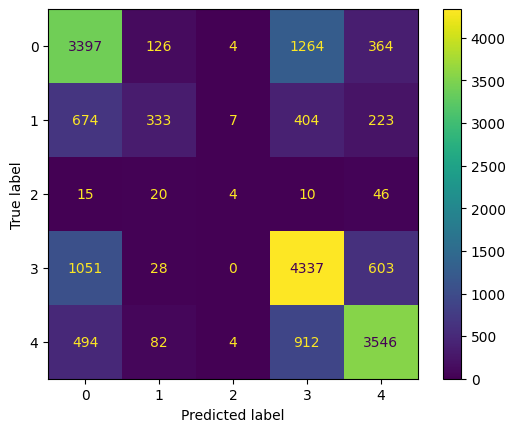

In [ ]:
#Ploting the confusion matrix

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()